              Open    High     Low   Close      Volume
2024-10-10  227.78  229.50  227.17  229.04  28183544.0
2024-10-09  225.23  229.75  224.83  229.54  33591091.0
2024-10-08  224.30  225.98  223.25  225.77  31855693.0
2024-10-07  224.50  225.69  221.33  221.69  39505354.0
2024-10-04  227.90  228.00  224.13  226.80  37345098.0
Mean Squared Error: 281.47921064635705


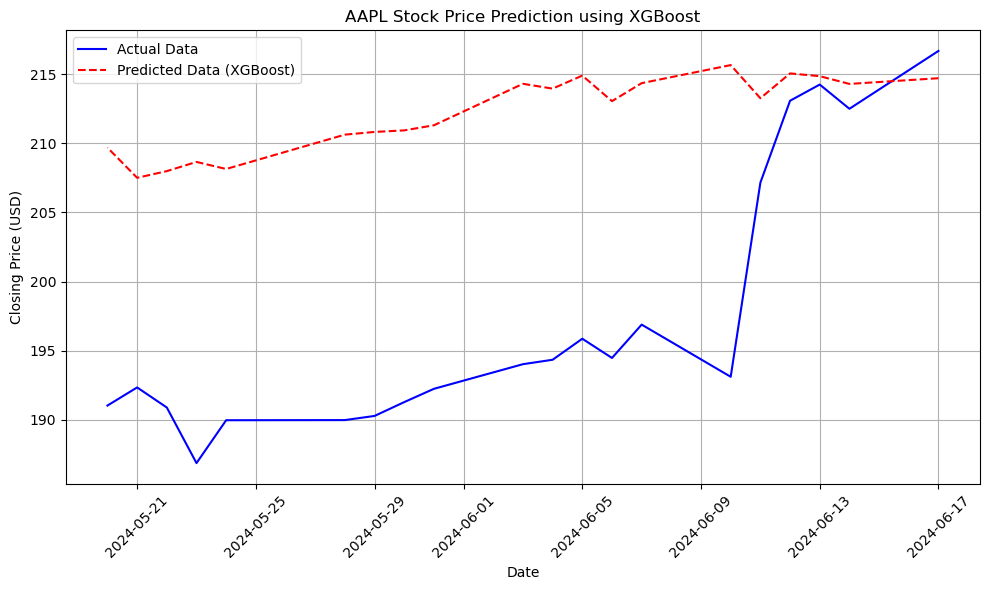

            Forecast_Close
2024-05-21      207.501999
2024-05-22      207.984375
2024-05-23      208.648514
2024-05-24      208.138336
2024-05-25      209.067734
2024-05-26      213.250107
2024-05-27      214.099167


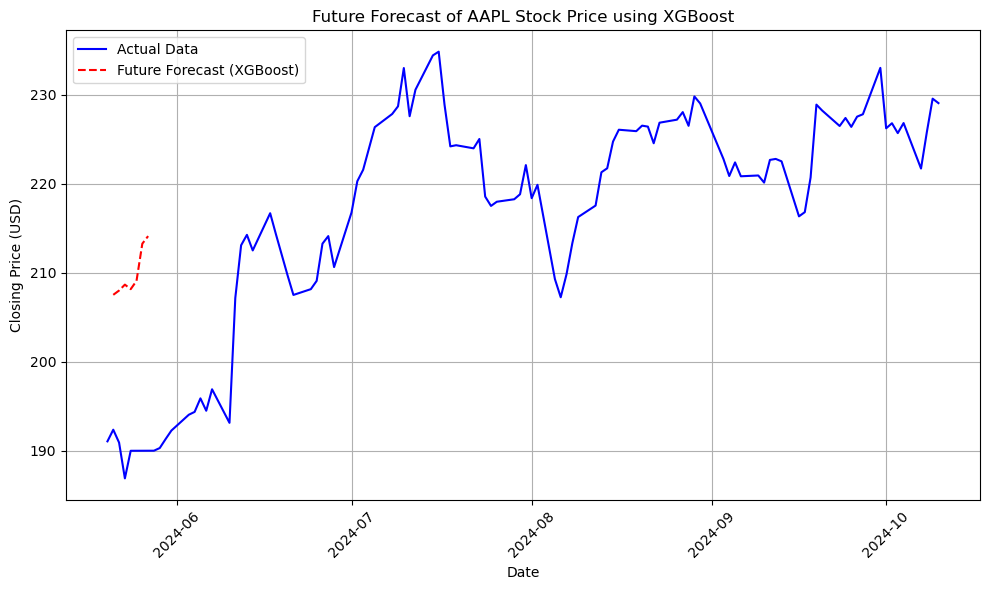

In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import timedelta

# Masukkan API key dari Alpha Vantage
api_key = "NLL3CM7W4Z4DNBAK"  # Ganti dengan API key yang kamu dapatkan

# Simbol saham yang ingin diambil datanya
symbol = "AAPL"  # Misalnya saham Apple

# URL endpoint untuk API
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}"

# Mengirim permintaan ke API dan mendapatkan hasilnya
response = requests.get(url)
data = response.json()

# Mengecek apakah permintaan berhasil
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]

    # Konversi data menjadi DataFrame pandas untuk memudahkan manipulasi
    df = pd.DataFrame.from_dict(time_series, orient='index')

    # Menamai kolom-kolom dengan nama yang lebih mudah
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    # Mengubah index menjadi tipe datetime untuk memudahkan manipulasi waktu
    df.index = pd.to_datetime(df.index)

    # Mengubah semua kolom dari string ke float untuk analisis numerik
    df = df.astype(float)

    # Menampilkan beberapa data teratas
    print(df.head())

    # Data untuk model
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    # Memilih fitur yang digunakan untuk prediksi
    X = df[['Day', 'Month', 'Year']]
    y = df['Close']  # Harga penutupan sebagai target prediksi

    # Membagi data menjadi data latih dan uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Membuat dan melatih model XGBoost
    model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data uji
    predictions = model.predict(X_test)

    # Menghitung error (MSE)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

    # Plot hasil prediksi vs nilai aktual
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[-len(X_test):], y_test, label='Actual Data', color='blue')
    plt.plot(df.index[-len(X_test):], predictions, label='Predicted Data (XGBoost)', color='red', linestyle='--')
    plt.title(f'{symbol} Stock Price Prediction using XGBoost')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Peramalan masa depan (contoh untuk 7 hari ke depan)
    future_dates = pd.date_range(start=df.index[-1] + timedelta(days=1), periods=7, freq='D')
    future_days = future_dates.day
    future_months = future_dates.month
    future_years = future_dates.year

    # Membuat DataFrame untuk prediksi masa depan
    future_df = pd.DataFrame({
        'Day': future_days,
        'Month': future_months,
        'Year': future_years
    })

    # Melakukan prediksi masa depan
    future_predictions = model.predict(future_df)

    # Menampilkan prediksi masa depan
    forecast_df = pd.DataFrame({'Forecast_Close': future_predictions}, index=future_dates)

    # Menampilkan hasil prediksi masa depan
    print(forecast_df)

    # Plot peramalan masa depan
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Close'], label='Actual Data', color='blue')
    plt.plot(forecast_df.index, forecast_df['Forecast_Close'], label='Future Forecast (XGBoost)', color='red', linestyle='--')
    plt.title(f'Future Forecast of {symbol} Stock Price using XGBoost')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

else:
    print("Error: Gagal mengambil data dari API.")


In [17]:
# Cek nama kolom
print(df.columns)  # Tambahkan ini untuk melihat kolom yang ada sebelum mengakses kolom 'Close'


Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
